In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import chain
from lib.uti import get_f_name,list_duplicates

In [129]:
df = pd.read_excel('./data/PItt-data.xlsx')  

/Users/cxx/opt/anaconda3/envs/ML/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [26]:
for i in df.columns:
    print(i,end='|')

id|idate|testigo|year|yearache|pwml|basedx|dx1|dx2|dx3|changedx|intertdx|changdx2|possible|probable|groupdx|curdx1|curdx2|curdx3|currdx4|entryage|onsetage|sex|race|educ|mmsegrp|mms|mattis|cdrfs|blessed|hamilton|htotal|hmtotal|nyu|ddate|psychot1|visit2da|hamilt2|hrs2tota|hrs2m|cdr2|bless2|nyu2|cerad2|mmse2|mattis2|visit3|hamilt3|hrs3tota|hrs3m|cdr3|bless3|nyu3|cerad3|mmse3|mattis3|visit4|hamilt4|hrs4tota|hrs4m|cdr4|bless4|nyu4|cerad4|mmse4|mattis4|visit5|hamilt5|hrs5tota|hrs5m|cdr5|bless5|nyu5|cerad5|mmse5|mattis5|visit6|hamilt6|hrs6tota|hrs6m|cdr6|bless6|nyu6|cerad6|mmse6|mattis6|visit7|hamilt7|hrs7tota|hrs7mo|cdr7|blessed7|nyu7|cerad7|mmse7|mattis7|lastdate|lastdx|lhamilto|lasthrs|lastcdr|lastnyu|eps|lastmms|lamattis|lastbless|

1=male, 0=female

In [37]:
sns.countplot(x='sex',data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

In [27]:
sns.catplot(x="sex", y="entryage", kind="box", data=df)

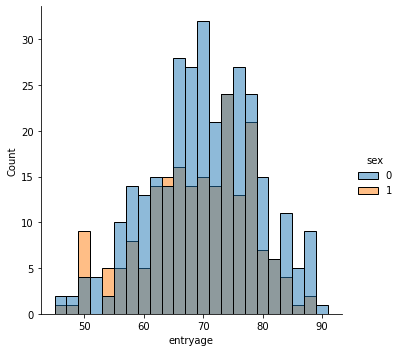

In [33]:
sns.displot(df, x="entryage",hue='sex',binwidth=2)

Diagnostic codes:

1, 100 = probable AD 
2, 200 = possible AD + something else

3, 300 = vascular dementia

4 = other dementia

    420, 430 = Parkinson
    
5 = person complains of problems, none diagnosed

    596 - Possible Dementia with Lewy bodies
    
6, 7 = mild cognitive impairment

       610, 611 = MCI multi cognitive domain type, touch of vis-sp, lang, and mem
       
       720, 740 = MCI with memory only, all else nl
       
       730 = psych -- general anxiety, depression no other symptoms, etc.
       
       770 - presence of cerebrovascular disease, usually small infarcts 
       
             in the brain detected by MRI, but without history of clinical strokes
             
8, 800 = control

         851 - control with cerebrovascular disease
         
9 = olivopontocerebellar degeneration, normal cognition


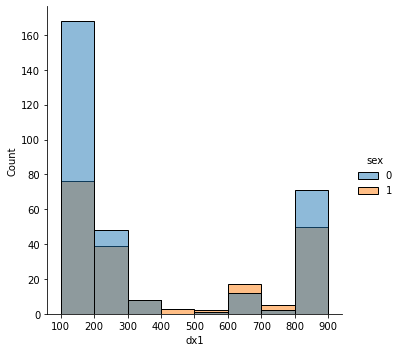

In [4]:
sns.displot(df, x="dx1",hue='sex',binwidth=100)

In [21]:
df[ (df['dx1']<300)  | ((df['dx1']>=800) & (df['dx1']<900)) ]

id      idate  testigo  year  yearache  pwml  basedx  dx1    dx2  dx3  \
0      1 1983-07-29        1     0         0   0.0       1  100    NaN  NaN   
1      2 1983-08-17        1     0         0   NaN       8  800   -2.0 -2.0   
2      3 1983-08-25        1     0         0   0.0       1  100    NaN  NaN   
3      5 1983-08-23        1     0         0   0.0       1  100  730.0  NaN   
4      6 1983-08-26        1     0         0   NaN       8  800   -2.0 -2.0   
..   ...        ...      ...   ...       ...   ...     ...  ...    ...  ...   
505  718 1988-03-24        1     0         0   NaN       2  210   -2.0 -2.0   
506  721 1988-03-29        1     0         0   NaN       1  100   -2.0 -2.0   
507  723 1988-03-31        1     0         0   0.0       1  100   -2.0 -2.0   
508  724 1988-04-05        1     0         0   NaN       2  210   -2.0 -2.0   
509  725 1988-04-07        1     0         0   0.0       1  100   -2.0 -2.0   

     ...   lastdate  lastdx lhamilto  lasthrs  lastcdr  lastnyu  eps  lastmms  \
0    ... 1986-08-12     NaN      NaN      0.0      3.0      5.0  NaN     11.0   
1    ... 2006-05-16   800.0      NaN      1.0      0.0      NaN  NaN     28.0   
2    ... 1985-11-07     NaN     10.0      2.0      3.0      NaN  NaN      5.0   
3    ... 1985-09-05     NaN     18.0      1.0      1.0     34.0  NaN     19.0   
4    ... 1998-10-15   800.0      NaN      2.0      0.0      0.0  NaN     30.0   
..   ...        ...     ...      ...      ...      ...      ...  ...      ...   
505  ...        NaT     NaN      NaN      NaN      NaN      NaN  NaN      NaN   
506  ... 1990-06-26     NaN      NaN      6.0      1.0      NaN  NaN     24.0   
507  ... 1991-04-09     NaN      2.0      3.0      3.0     20.0  NaN      8.0   
508  ...        NaT     NaN      NaN      NaN      NaN      NaN  NaN      NaN   
509  ... 1989-05-05   100.0     11.0      3.0      5.0     34.0  NaN      7.0   

     lamattis  lastbless  
0         NaN       15.0  
1         NaN        NaN  
2         NaN        NaN  
3         NaN        4.0  
4       142.0        0.0  
..        ...        ...  
505       NaN        NaN  
506       NaN        3.5  
507      61.0        7.5  
508       NaN        NaN  
509      41.0       18.0  

[452 rows x 106 columns]

In [20]:
df[ (df['dx1']<300)]

id      idate  testigo  year  yearache  pwml  basedx  dx1    dx2  dx3  \
0      1 1983-07-29        1     0         0   0.0       1  100    NaN  NaN   
2      3 1983-08-25        1     0         0   0.0       1  100    NaN  NaN   
3      5 1983-08-23        1     0         0   0.0       1  100  730.0  NaN   
5      7 1983-08-26        1     0         0   0.0       1  100  730.0 -2.0   
7     10 1983-08-09        1     0         0   0.0       1  100  730.0  NaN   
..   ...        ...      ...   ...       ...   ...     ...  ...    ...  ...   
505  718 1988-03-24        1     0         0   NaN       2  210   -2.0 -2.0   
506  721 1988-03-29        1     0         0   NaN       1  100   -2.0 -2.0   
507  723 1988-03-31        1     0         0   0.0       1  100   -2.0 -2.0   
508  724 1988-04-05        1     0         0   NaN       2  210   -2.0 -2.0   
509  725 1988-04-07        1     0         0   0.0       1  100   -2.0 -2.0   

     ...   lastdate  lastdx lhamilto  lasthrs  lastcdr  lastnyu  eps  lastmms  \
0    ... 1986-08-12     NaN      NaN      0.0      3.0      5.0  NaN     11.0   
2    ... 1985-11-07     NaN     10.0      2.0      3.0      NaN  NaN      5.0   
3    ... 1985-09-05     NaN     18.0      1.0      1.0     34.0  NaN     19.0   
5    ... 1989-07-31     NaN      6.0      3.0      3.0     22.0  NaN     15.0   
7    ... 1987-02-01     NaN      NaN      1.0      2.0      7.0  NaN     19.0   
..   ...        ...     ...      ...      ...      ...      ...  ...      ...   
505  ...        NaT     NaN      NaN      NaN      NaN      NaN  NaN      NaN   
506  ... 1990-06-26     NaN      NaN      6.0      1.0      NaN  NaN     24.0   
507  ... 1991-04-09     NaN      2.0      3.0      3.0     20.0  NaN      8.0   
508  ...        NaT     NaN      NaN      NaN      NaN      NaN  NaN      NaN   
509  ... 1989-05-05   100.0     11.0      3.0      5.0     34.0  NaN      7.0   

     lamattis  lastbless  
0         NaN       15.0  
2         NaN        NaN  
3         NaN        4.0  
5         NaN        6.0  
7         NaN       16.0  
..        ...        ...  
505       NaN        NaN  
506       NaN        3.5  
507      61.0        7.5  
508       NaN        NaN  
509      41.0       18.0  

[331 rows x 106 columns]

In [130]:
tem_f = get_f_name('./processed_data/Pitt/all/')
tem_f = [i.split('-')[0] for i in tem_f]
id1 = np.int_(list(dict.fromkeys(tem_f)))

In [131]:
tem_f = get_f_name('./data/audio/Pitt/Control/')
tem_f = [i.split('-')[0] for i in tem_f]
id2 = list(dict.fromkeys(tem_f))
tem_f = get_f_name('./data/audio/Pitt/Dementia/')
tem_f = [i.split('-')[0] for i in tem_f]
id3 = list(dict.fromkeys(tem_f))
id4 = id2 + id3; id4.sort()
id4 = np.int_(id4)

In [132]:
len(id1)

292

In [133]:
df[df['id'].isin(id4)].to_csv('./data/annotation.csv',index = False)

In [116]:
t = df['id'].values

In [123]:
tem = df[df['id'].isin(id4)]

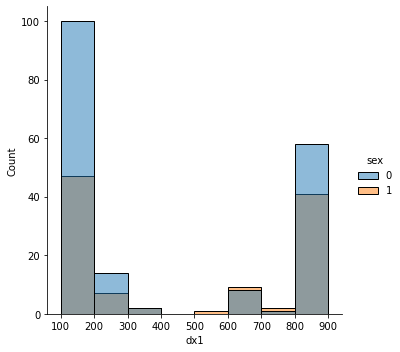

In [124]:
sns.displot(tem, x="dx1",hue='sex',binwidth=100)

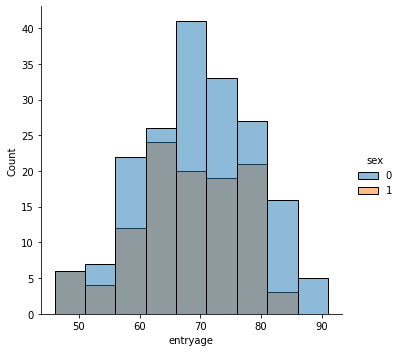

In [127]:
sns.displot(tem, x="entryage",hue='sex',binwidth=5)

In [5]:
df = pd.read_csv('./data/annotation.csv')

In [137]:
df

id       idate  testigo  year  yearache  pwml  basedx  dx1    dx2  dx3  \
0      1  1983-07-29        1     0         0   0.0       1  100    NaN  NaN   
1      2  1983-08-17        1     0         0   NaN       8  800   -2.0 -2.0   
2      3  1983-08-25        1     0         0   0.0       1  100    NaN  NaN   
3      5  1983-08-23        1     0         0   0.0       1  100  730.0  NaN   
4      6  1983-08-26        1     0         0   NaN       8  800   -2.0 -2.0   
..   ...         ...      ...   ...       ...   ...     ...  ...    ...  ...   
287  705  1988-02-09        1     0         0   0.0       1  100   -2.0 -2.0   
288  707  1988-02-18        1     0         0   NaN       2  210   -2.0 -2.0   
289  709  1988-02-11        1     0         0   NaN       8  820   -2.0 -2.0   
290  711  1988-02-25        1     0         0   NaN       2  211   -2.0 -2.0   
291  714  1988-03-08        1     0         0   NaN       2  210   -2.0 -2.0   

     ...    lastdate  lastdx lhamilto  lasthrs  lastcdr  lastnyu  eps  \
0    ...  1986-08-12     NaN      NaN      0.0      3.0      5.0  NaN   
1    ...  2006-05-16   800.0      NaN      1.0      0.0      NaN  NaN   
2    ...  1985-11-07     NaN     10.0      2.0      3.0      NaN  NaN   
3    ...  1985-09-05     NaN     18.0      1.0      1.0     34.0  NaN   
4    ...  1998-10-15   800.0      NaN      2.0      0.0      0.0  NaN   
..   ...         ...     ...      ...      ...      ...      ...  ...   
287  ...  1991-03-20   100.0     17.0      1.0      3.0     30.0  NaN   
288  ...  1991-04-05     NaN      0.0      5.0      2.0      2.0  NaN   
289  ...  1989-02-21   820.0      2.0      3.0      0.0      0.0  NaN   
290  ...  1990-03-08   210.0      2.0     10.0      1.0      8.0  NaN   
291  ...  1990-06-06     NaN      NaN      9.0      3.0     45.0  NaN   

     lastmms  lamattis  lastbless  
0       11.0       NaN       15.0  
1       28.0       NaN        NaN  
2        5.0       NaN        NaN  
3       19.0       NaN        4.0  
4       30.0     142.0        0.0  
..       ...       ...        ...  
287      6.0       NaN       12.0  
288     15.0       NaN        7.5  
289     29.0     142.0        0.5  
290     21.0     113.0        3.5  
291      7.0      37.0       12.5  

[292 rows x 106 columns]

In [16]:
df = pd.read_csv('./data/annotation.csv')
tem_f = get_f_name('./data/audio/Pitt/Control/')
tem_f_c = [i.split('-')[0] for i in tem_f]
id_c = list(dict.fromkeys(tem_f_c))

tem_f = get_f_name('./data/audio/Pitt/Dementia/')
tem_f_ad = [i.split('-')[0] for i in tem_f]
id_ad = list(dict.fromkeys(tem_f_ad))

rg_list = [range(50, 55),range(55, 60),range(60, 65),range(65, 70),range(70, 75),range(75, 80)]
id_c = set(map(int, id_c))
id_c.remove(172)
id_ad = set(map(int,id_ad))

def get_sorted_id_by_num(id_list, n, all_list):
    k = {int(k):len(v) for k,v in list_duplicates(all_list)}
    sorted_x = sorted({m:k[m] for m in id_list}.items(), key=lambda kv: kv[1],reverse=True)
    return [i[0] for i in sorted_x[:n]]

selected_id = []
for rg in rg_list[:-1]:
    female = set(df[df['entryage'].isin(list(rg)) & (df.sex==0)]['id'].values)
    male = set(df[df['entryage'].isin(list(rg)) & (df.sex==1)]['id'].values)
    female_control = female.intersection(id_c); male_control = male.intersection(id_c)
    
    num = min(len(female_control),len(male_control))
    selected_id_f_c = get_sorted_id_by_num(female_control, num, tem_f_c)
    selected_id_m_c = get_sorted_id_by_num(male_control, num, tem_f_c)

    #selected_id_f_c = np.random.choice(list(female_control), num, replace=False) 
    #selected_id_m_c = np.random.choice(list(male_control), num, replace=False) 
    selected_id_c = np.append(selected_id_f_c, selected_id_m_c, axis=0)
    #print(selected_id_c,len(selected_id_c))

    female_ad = female.intersection(id_ad); male_ad = male.intersection(id_ad)
    num = min(len(female_ad),len(male_ad))
    selected_id_f_ad = get_sorted_id_by_num(female_ad, num, tem_f_ad)
    selected_id_m_ad = get_sorted_id_by_num(male_ad, num, tem_f_ad)

    #selected_id_f_ad = np.random.choice(list(female_ad), num, replace=False) 
    #selected_id_m_ad = np.random.choice(list(male_ad), num, replace=False) 

    selected_id_ad = np.append(selected_id_f_ad, selected_id_m_ad, axis=0)
    #print(selected_id_ad, len(selected_id_ad))
    selected_id.extend(list(chain(selected_id_c,selected_id_ad)))

female = set(df[df['entryage'].isin(list(rg_list[-1])) & (df.sex==0)]['id'].values)
male = set(df[df['entryage'].isin(list(rg_list[-1])) & (df.sex==1)]['id'].values)
female_control = female.intersection(id_c); male_control = male.intersection(id_c)
    

selected_id_f_c = get_sorted_id_by_num(female_control, 3, tem_f_c)
selected_id_m_c = get_sorted_id_by_num(male_control, 3, tem_f_c)

selected_id_c = np.append(selected_id_f_c, selected_id_m_c, axis=0)

female_ad = female.intersection(id_ad); male_ad = male.intersection(id_ad)
selected_id_f_ad = get_sorted_id_by_num(female_ad,5, tem_f_ad)
selected_id_m_ad = get_sorted_id_by_num(male_ad, 5, tem_f_ad)

selected_id_ad = np.append(selected_id_f_ad, selected_id_m_ad, axis=0)

selected_id.extend(list(chain(selected_id_c,selected_id_ad)))

In [5]:
df = pd.read_csv('./data/annotation.csv')
tem_f = get_f_name('./data/audio/Pitt/Control/')
tem_f_c = [i.split('-')[0] for i in tem_f]
id_c = list(dict.fromkeys(tem_f_c))

tem_f = get_f_name('./data/audio/Pitt/Dementia/')
tem_f_ad = [i.split('-')[0] for i in tem_f]
id_ad = list(dict.fromkeys(tem_f_ad))

rg_list = [range(50, 55),range(55, 60),range(60, 65),range(65, 70),range(70, 75),range(75, 80)]
#rg_list = [range(50, 60),range(60, 70),range(70, 80)]
id_c = set(map(int, id_c))
id_c.remove(172)
id_ad = set(map(int,id_ad))
id_ad.remove(172)

def get_sorted_id_by_num(id_list, n, all_list):
    k = {int(k):len(v) for k,v in list_duplicates(all_list)}
    sorted_x = sorted({m:k[m] for m in id_list}.items(), key=lambda kv: kv[1],reverse=True)
    return [i[0] for i in sorted_x[:n]]

selected_id = []
for rg in rg_list:
    female = set(df[df['entryage'].isin(list(rg)) & (df.sex==0)]['id'].values)
    male = set(df[df['entryage'].isin(list(rg)) & (df.sex==1)]['id'].values)
    female_control = female.intersection(id_c); male_control = male.intersection(id_c)
    female_ad = female.intersection(id_ad); male_ad = male.intersection(id_ad)

    num1 = min(len(female_control),len(female_ad))
    num2 = min(len(male_control),  len(male_ad))

    selected_id_f_c = get_sorted_id_by_num(female_control, num1, tem_f_c)
    selected_id_f_ad = get_sorted_id_by_num(female_ad, num1, tem_f_ad)
    
    selected_id_f = np.append(selected_id_f_c, selected_id_f_ad, axis=0)

    selected_id_m_c =  get_sorted_id_by_num(male_control, num2, tem_f_c)
    selected_id_m_ad = get_sorted_id_by_num(male_ad, num2, tem_f_ad)

    selected_id_m = np.append(selected_id_m_c, selected_id_m_ad, axis=0)

    selected_id.extend(list(chain(selected_id_f,selected_id_m)))

In [18]:
selected_id = np.load('./data/selected_id3.npy')

array([  1,   2,   3,   6,   7,  10,  13,  14,  15,  16,  18,  21,  22,
        23,  29,  30,  33,  34,  35,  42,  43,  45,  46,  49,  50,  51,
        52,  53,  56,  58,  59,  61,  62,  65,  67,  68,  70,  71,  73,
        76,  78,  86,  92,  93,  94,  96, 105, 107, 109, 114, 118, 120,
       121, 128, 129, 130, 132, 134, 137, 138, 139, 141, 143, 144, 146,
       148, 150, 154, 158, 164, 166, 167, 168, 172, 175, 178, 181, 182,
       183, 184, 190, 192, 196, 203, 207, 208, 209, 210, 213, 216, 218,
       220, 221, 222, 225, 227, 229, 232, 234, 235, 238, 242, 243, 244,
       245, 248, 252, 255, 256, 257, 260, 264, 266, 267, 268, 269, 270,
       274, 279, 280, 282, 283, 289, 291, 295, 296, 297, 298, 299, 304,
       306, 318, 319, 322, 325, 332, 344, 354, 356, 358, 362, 450, 468,
       471, 488, 526, 527, 528, 529, 544, 578, 587, 592, 612, 624, 627,
       631, 635, 640, 651, 656, 657, 661, 663, 668, 676, 681, 684, 688,
       690, 691, 709])

In [17]:
np.save('./data/selected_id3',np.array(sorted(selected_id))) 

In [3]:
selected_id = np.load('./data/selected_id.npy') 

In [4]:
len(selected_id)

200

In [6]:
df = pd.read_csv('./data/annotation.csv')
tem_f = get_f_name('./data/audio/Pitt/Control/')
tem_f_c = [i.split('-')[0] for i in tem_f]
id_c = list(dict.fromkeys(tem_f_c))

tem_f = get_f_name('./data/audio/Pitt/Dementia/')
tem_f_ad = [i.split('-')[0] for i in tem_f]
id_ad = list(dict.fromkeys(tem_f_ad))

rg_list = [range(50, 55),range(55, 60),range(60, 65),range(65, 70),range(70, 75),range(75, 80)]
id_c = set(map(int, id_c))
id_c.remove(172)
id_ad = set(map(int,id_ad))
id_ad.remove(172)

In [43]:
selected_id = np.delete(selected_id, np.argwhere(selected_id == 172))

In [42]:
selected_id = np.load('./data/selected_id3.npy') 

In [44]:
df_tem = df[df.id.isin(selected_id)]
rg_list = [range(50, 55),range(55, 60),range(60, 65),range(65, 70),range(70, 75),range(75, 80)]
for rg in rg_list:
    tem = df_tem[( (df_tem['sex'] ==0) & df_tem['entryage'].isin(rg) )]
    print(len([i for i in tem.id.values if i in id_ad]), end=' ')
    print(len([i for i in tem.id.values if i in id_c ]))

1 4
6 6
10 9
13 9
11 8
5 3


In [45]:
df_tem = df[df.id.isin(selected_id)]
rg_list = [range(50, 55),range(55, 60),range(60, 65),range(65, 70),range(70, 75),range(75, 80)]
for rg in rg_list:
    tem = df_tem[( (df_tem['sex'] ==1) & df_tem['entryage'].isin(rg) )]
    print(len([i for i in tem.id.values if i in id_ad]), end=' ')
    print(len([i for i in tem.id.values if i in id_c ]))

1 4
6 6
10 9
13 9
12 8
5 3


In [22]:
df_tem = df[df.id.isin(selected_id)]
rg_list = [range(50, 55),range(55, 60),range(60, 65),range(65, 70),range(70, 75),range(75, 80)]
for rg in rg_list:
    tem = df_tem[( (df_tem['sex'] ==0) & df_tem['entryage'].isin(rg) )]
    print(len([i for i in tem.id.values if i in id_ad]), end=' ')
    print(len([i for i in tem.id.values if i in id_c ]))
    print('--------')
    tem = df_tem[( (df_tem['sex'] ==1) & df_tem['entryage'].isin(rg) )]
    print(len([i for i in tem.id.values if i in id_ad]), end=' ')
    print(len([i for i in tem.id.values if i in id_c ]))

1 4
--------
1 4
6 6
--------
6 6
10 9
--------
10 9
13 9
--------
13 9
11 8
--------
12 8
5 3
--------
5 3


In [8]:
print(len([i for i in tem.id.values if i in id_ad]))
print(len([i for i in tem.id.values if i in id_c ]))

11
8


In [184]:
tem = df_tem[( df_tem['sex'] == 0)]

In [190]:
len(id_ad)

194

In [194]:
df = pd.read_csv('./data/annotation.csv')
tem_f = get_f_name('./data/audio/Pitt/Control/')
tem_f_c = [i.split('.')[0] for i in tem_f]
id_c = list(dict.fromkeys(tem_f_c))

tem_f = get_f_name('./data/audio/Pitt/Dementia/')
tem_f_ad = [i.split('.')[0] for i in tem_f]
id_ad = list(dict.fromkeys(tem_f_ad))


In [197]:
len(id_ad)

309